In [1]:
import matplotlib
import statsmodels.api as sm
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
import datetime
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'


Month
1958-01-31    5.828946
1958-02-28    5.762051
1958-03-31    5.891644
1958-04-30    5.852202
1958-05-31    5.894403
1958-06-30    6.075346
1958-07-31    6.196444
1958-08-31    6.224558
1958-09-30    6.001415
1958-10-31    5.883322
1958-11-30    5.736572
1958-12-31    5.820083
1959-01-31    5.886104
1959-02-28    5.834811
1959-03-31    6.006353
1959-04-30    5.981414
1959-05-31    6.040255
1959-06-30    6.156979
1959-07-31    6.306275
1959-08-31    6.326149
1959-09-30    6.137727
1959-10-31    6.008813
1959-11-30    5.891644
1959-12-31    6.003887
1960-01-31    6.033086
1960-02-29    5.968708
1960-03-31    6.037871
1960-04-30    6.133398
1960-05-31    6.156979
1960-06-30    6.282267
1960-07-31    6.432940
1960-08-31    6.406880
1960-09-30    6.230481
1960-10-31    6.133398
1960-11-30    5.966147
1960-12-31    6.068426
Freq: M, Name: #Passengers, dtype: float64


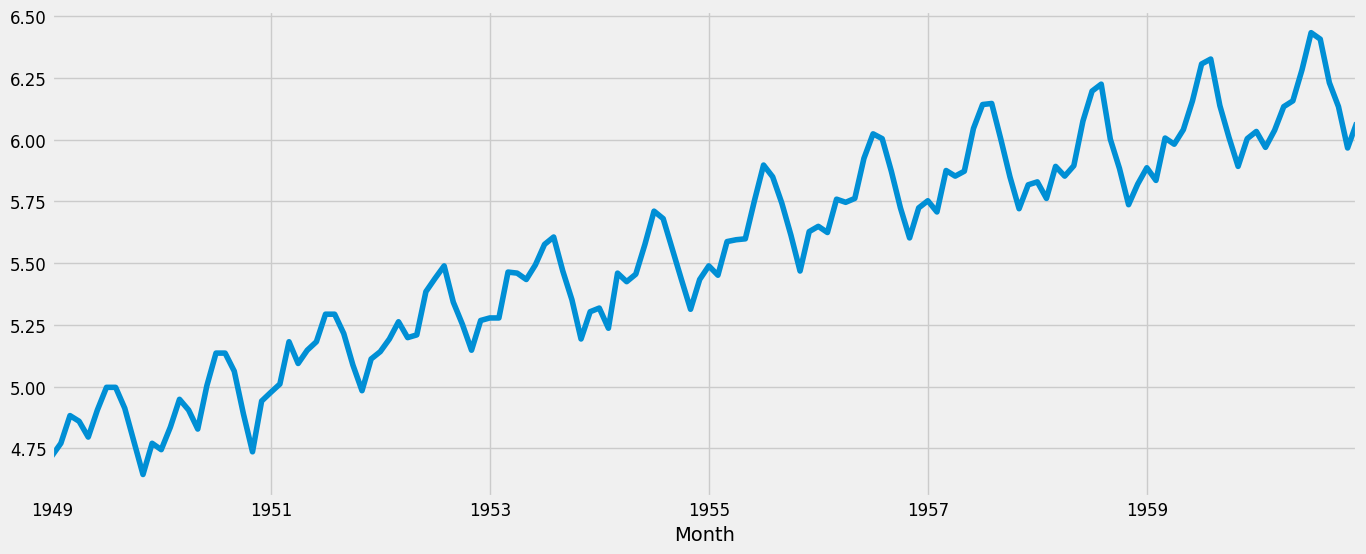

In [2]:

# df = pd.read_excel("Superstore2.xlsx")
dateparse = lambda dates:datetime.datetime.strptime(dates, '%Y-%m')
furniture = pd.read_csv('AirPassengers.csv', parse_dates=['Month'], index_col='Month',date_parser=dateparse)

# Si tienes varios valores por mes, te hace la media y te lo mete en el mes.
# Y de paso sobreescribe el índice para que sea el último día de cada mes
y = np.log(furniture['#Passengers']).resample('M').mean()

print(y['1958':])

y.plot(figsize=(15, 6))
plt.show()

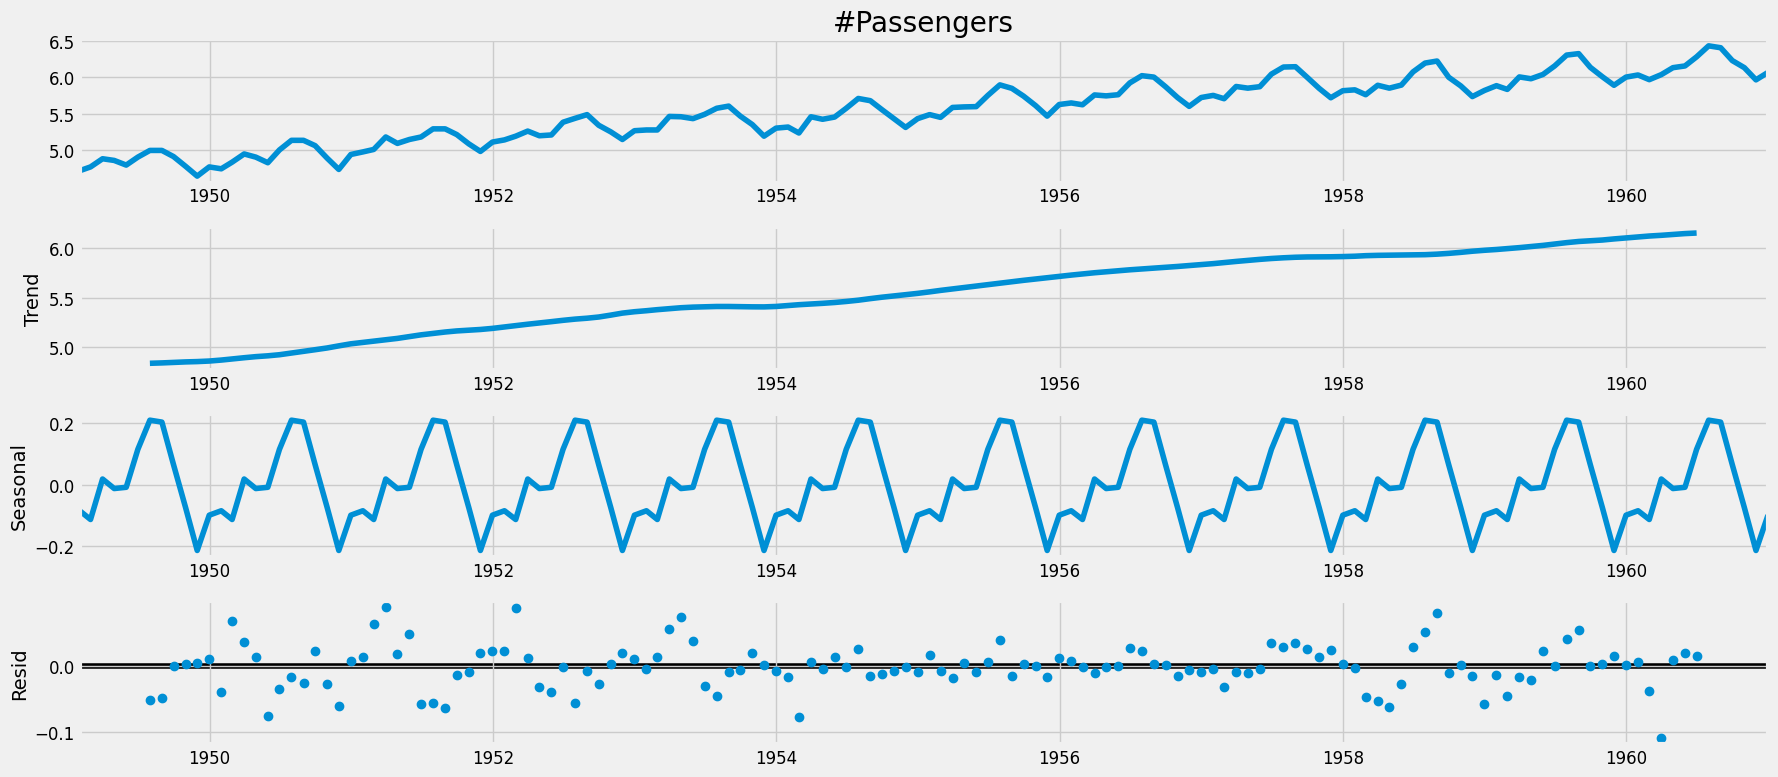

In [3]:
# Descomposición estacional
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()


In [4]:
# ------------------------------------
# Predicción ARIMA
# ------------------------------------

y_train = y[:'1958']
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12)
                for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

# Ajuste de hiperparámetros
mejor = np.inf
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_invertibility=False)
            results = mod.fit(disp=False)
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
            if results.aic < mejor:
                mejor = results.aic
                mejores_parametros = [param, param_seasonal]
        except:
            continue


Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:749.243803411657
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:624.0144784932249
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:-118.98501028906941
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:-157.06750994817145
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:-42.41062664034971
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:-80.53523878496962
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:-195.16768730149778
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:-224.5553912160406
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:590.7982675462108
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:464.65819707538446
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:-206.56473468058059
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:-222.81715275180503
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:-143.26509630446674
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:-158.13290261764422
ARIMA(0, 0, 1)x(

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f= -1.01949D+00    |proj g|=  7.99218D+00

At iterate    5    f= -1.68374D+00    |proj g|=  2.35135D+00

At iterate   10    f= -1.68878D+00    |proj g|=  1.90774D-01

At iterate   15    f= -1.68936D+00    |proj g|=  2.84214D-02

At iterate   20    f= -1.68948D+00    |proj g|=  2.31412D-01

At iterate   25    f= -1.70193D+00    |proj g|=  4.68605D+00


 This problem is unconstrained.



At iterate   30    f= -1.72211D+00    |proj g|=  3.47586D-02

At iterate   35    f= -1.72259D+00    |proj g|=  3.61721D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     37     64      1     0     0   5.258D-04  -1.723D+00
  F =  -1.7225919982548716     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2907      0.082     -3.541      0.000      -0.452      -0.130
ar.S.L12       0.9887      0.009    110.283      0.000       0


   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


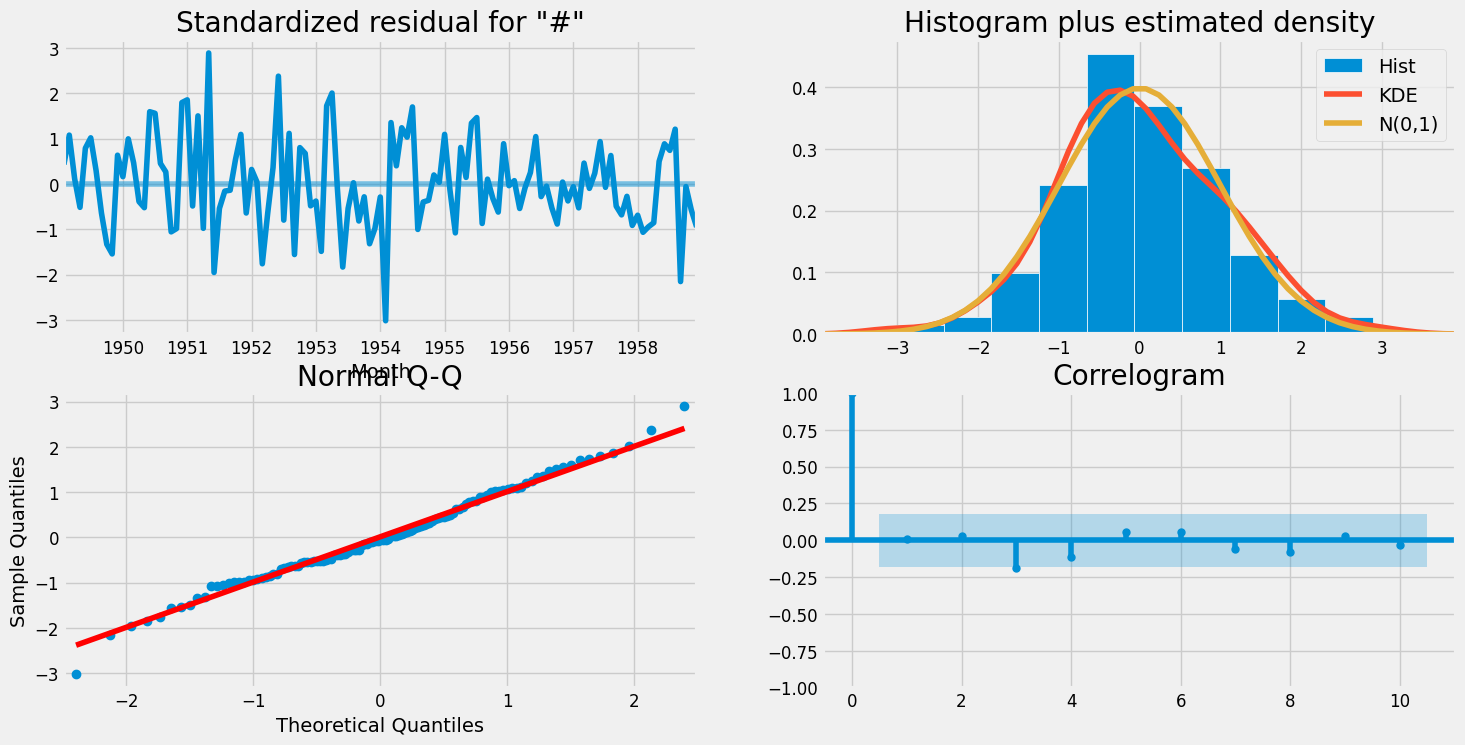

In [5]:
# Ajuste del modelo
mod = sm.tsa.statespace.SARIMAX(y_train,
                                order=mejores_parametros[0],
                                seasonal_order=mejores_parametros[1],
                                enforce_invertibility=False)
results = mod.fit()


print(results.summary().tables[1])

results.plot_diagnostics(figsize=(16, 8))
plt.show()


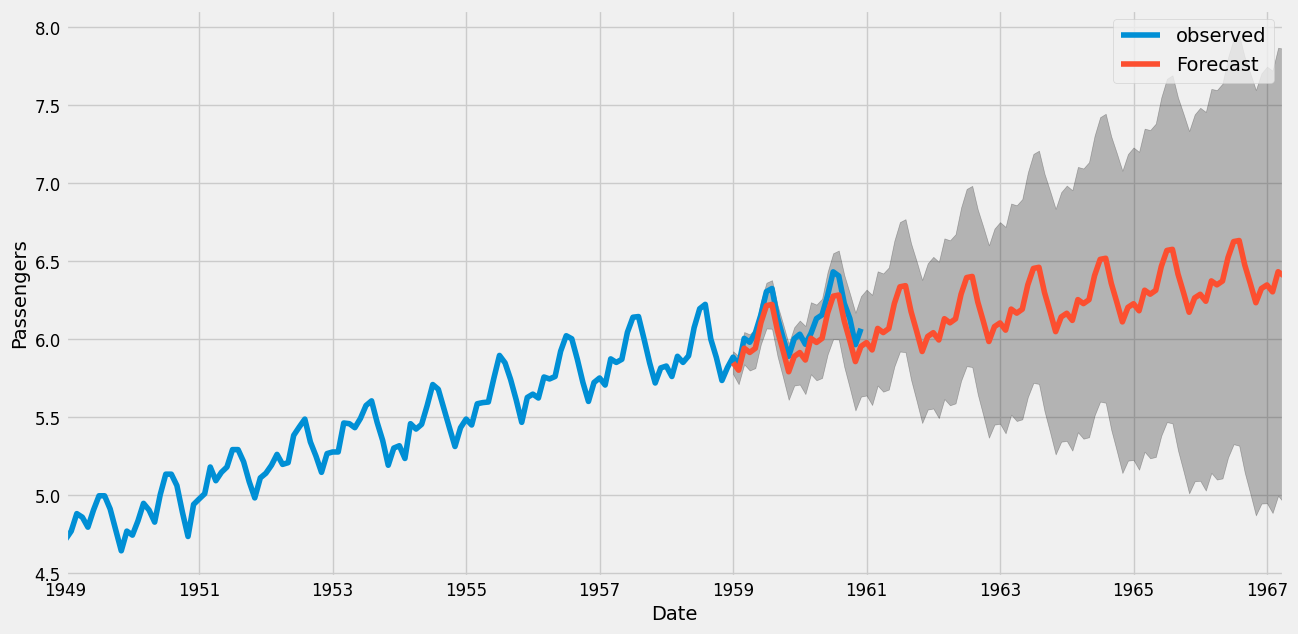

In [6]:
# Predicción a múltiples pasos
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = y.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Passengers')
plt.legend()
plt.show()


In [7]:

# Evaluación de la predicción ARIMA
y_truth= y['1959':]
predicciones_arima = pred_uc.predicted_mean[y_truth.index] # predicciones del último año

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean() # RELE = lo que predije - realidad / bla bla --> Error porcentual
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round(np.sqrt(rele), 2)))


Error cuadrático medio ARIMA 0.01
Raíz cuadrada de ECM ARIMA 0.1
Error porcentual medio ARIMA 1.26


# Segunda parte

- A veces los productos tienen una tendencia común (suben y bajan a la vez) --> A veces darle datos sobre más productos da lugar a una predicción mejor

## Holt-Winters
Sistema que hace un alisado exponencial (suaviza una serie temporal).
Se puede usar:
- Para la serie
- Para la pendiente de la serie
- Para la oscilación de la serie

Error cuadrático medio HW 0.01
Raíz cuadrada de ECM HW 0.08
Error porcentual medio HW 1.06


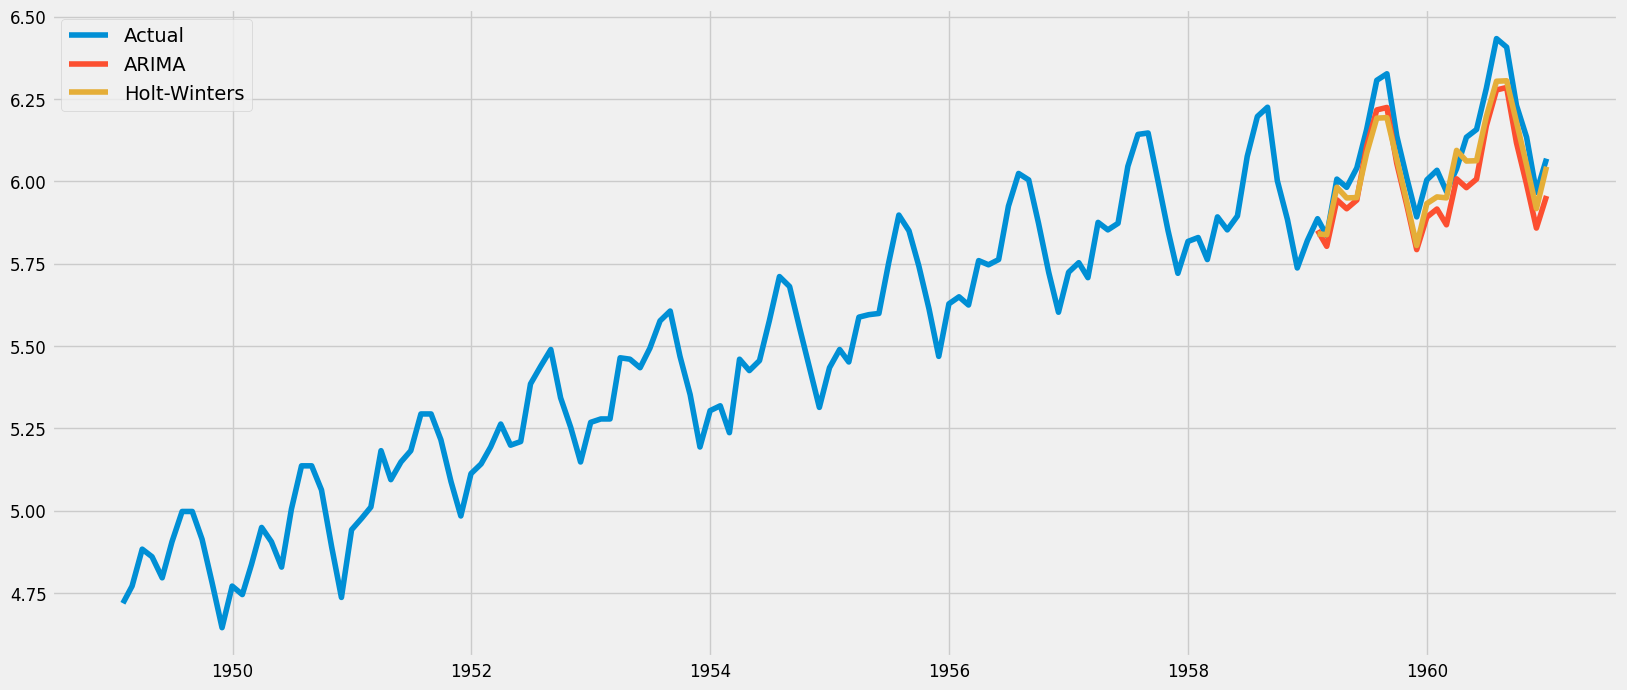

In [8]:

# ------------------------------------
# Holt-Winters
# ------------------------------------
y_train = y[:'1958']
from statsmodels.tsa.api import ExponentialSmoothing
hw_model = ExponentialSmoothing(
    y_train, trend='add', seasonal='add', seasonal_periods=12).fit()
predicciones_hw = hw_model.forecast(24)

mse = ((predicciones_hw - y_truth) ** 2).mean()
rele = (np.abs(predicciones_hw - y_truth)/y_truth*100).mean ()
print('Error cuadrático medio HW {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM HW {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio HW {}'.format(round(np.sqrt(rele), 2)))

plt.plot(y, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.legend()
plt.show()


## Prohet
Algoritmo de META para predecir series temporales. Es muy buena para predicciones a largo plazo.

No tiene una forma amigable de preparar los datos:
- Hacer un dataframe en el que las columnas se llaman de una manera concreta
- Llamar a `make_future_dataframe`

La variable a predecir: "y"
La variable predicha: "y_hat" (ŷ)

Cambiar código para que no ponga oficina y eso

17:01:52 - cmdstanpy - INFO - Chain [1] start processing
17:01:52 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1800x600 with 0 Axes>

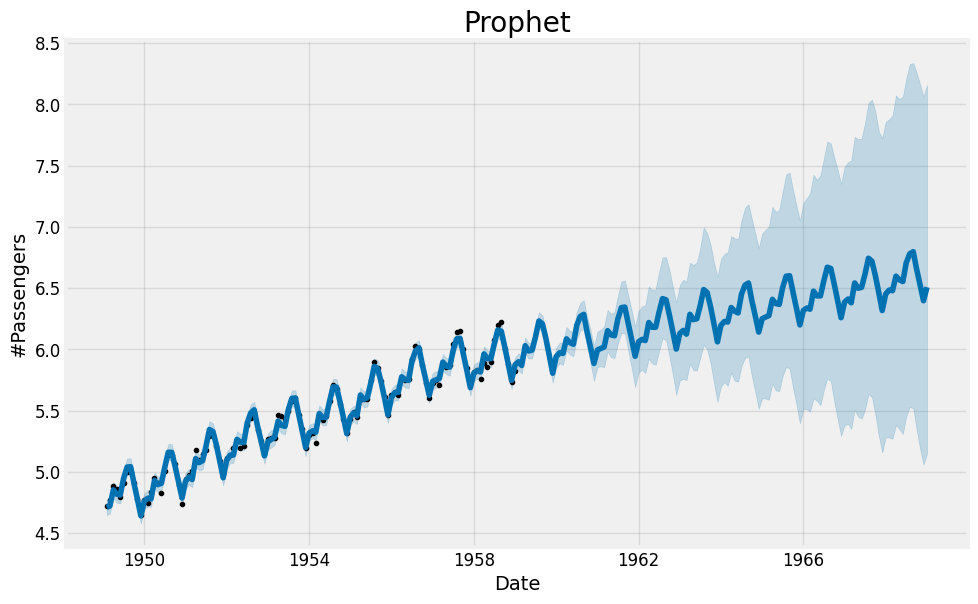

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-31,4.819059,4.646900,4.777031,4.819059,4.819059,-0.108336,-0.108336,-0.108336,-0.108336,-0.108336,-0.108336,0.0,0.0,0.0,4.710723
1,1949-02-28,4.823293,4.659273,4.785787,4.823293,4.823293,-0.102256,-0.102256,-0.102256,-0.102256,-0.102256,-0.102256,0.0,0.0,0.0,4.721037
2,1949-03-31,4.827980,4.786870,4.916065,4.827980,4.827980,0.025210,0.025210,0.025210,0.025210,0.025210,0.025210,0.0,0.0,0.0,4.853190
3,1949-04-30,4.832516,4.748228,4.883094,4.832516,4.832516,-0.014395,-0.014395,-0.014395,-0.014395,-0.014395,-0.014395,0.0,0.0,0.0,4.818121
4,1949-05-31,4.837203,4.743033,4.879144,4.837203,4.837203,-0.026759,-0.026759,-0.026759,-0.026759,-0.026759,-0.026759,0.0,0.0,0.0,4.810444


In [10]:

# ------------------------------------
# Prophet
# ------------------------------------

# Si tienes un mac M1/M2 es mejor usar la versión antigua fbprophet y python 3.8 o 3.9
# (21/11/2022)

from prophet import Prophet
# from fbprophet import Prophet


furniture_train = y[:'1958'].to_frame()
furniture_train.index.name = "ds"
furniture_train = furniture_train.rename(columns={'#Passengers': 'y'})
furniture_train.reset_index(inplace=True)

furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(furniture_train)

furniture_forecast = furniture_model.make_future_dataframe(
    periods=120, freq='M')
furniture_forecast = furniture_model.predict(furniture_forecast)

plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel='Date', ylabel='#Passengers', )
plt.title('Prophet')
plt.show()

furniture_forecast.head()


Error cuadrático medio ARIMA 0.01
Raíz cuadrada de ECM ARIMA 0.1
Error porcentual medio ARIMA 1.26
Error cuadrático medio PROPHET 0.01
Raíz cuadrada de ECM PROPHET 0.08
Error porcentual medio PROPHET 1.06


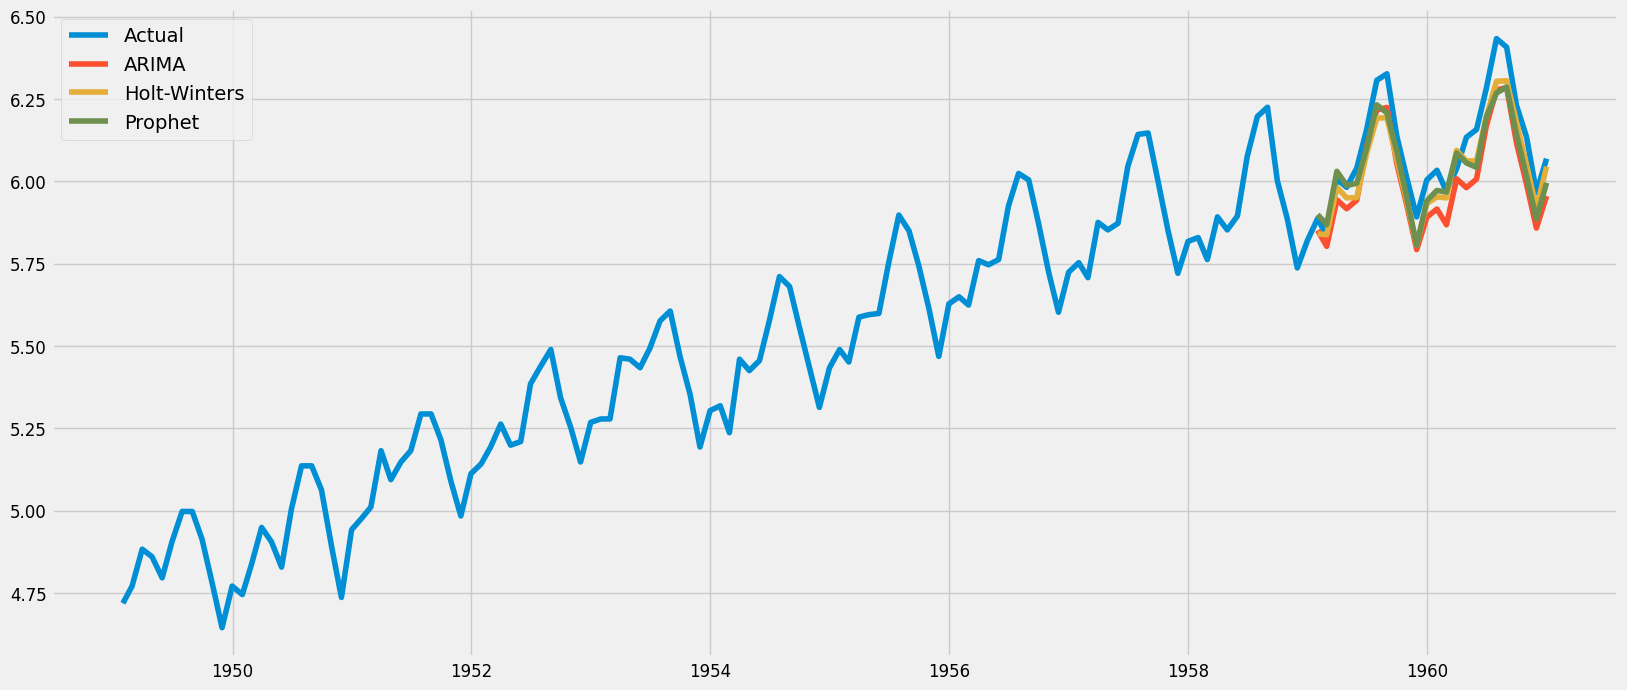

In [17]:

# ------------------------------------
# COMPARATIVA PREDICCION ARIMA-PROPHET
# ------------------------------------

mse = ((predicciones_arima - y_truth) ** 2).mean()
rele = (np.abs(predicciones_arima - y_truth)/y_truth*100).mean()
print('Error cuadrático medio ARIMA {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM ARIMA {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio ARIMA {}'.format(round(np.sqrt(rele), 2)))

furniture_forecast.set_index("ds", inplace=True)
predicciones_prophet = furniture_forecast.loc[y_truth.index, "yhat"]
mse = ((predicciones_prophet - y_truth) ** 2).mean()
rele = (np.abs(predicciones_prophet - y_truth)/y_truth*100).mean()
print('Error cuadrático medio PROPHET {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM PROPHET {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio PROPHET {}'.format(round(np.sqrt(rele), 2)))

plt.plot(y, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.legend()
plt.show()


## DeepAR
De Amazon. Red Neuronal Recurrente (las salidas se vuelven a meter en las entradas).

No está hecho para predecir a largo plazo.

                   y
ds                  
1949-01-31  4.718499
1949-02-28  4.770685
1949-03-31  4.882802
1949-04-30  4.859812
1949-05-31  4.795791
...              ...
1958-08-31  6.224558
1958-09-30  6.001415
1958-10-31  5.883322
1958-11-30  5.736572
1958-12-31  5.820083

[120 rows x 1 columns]


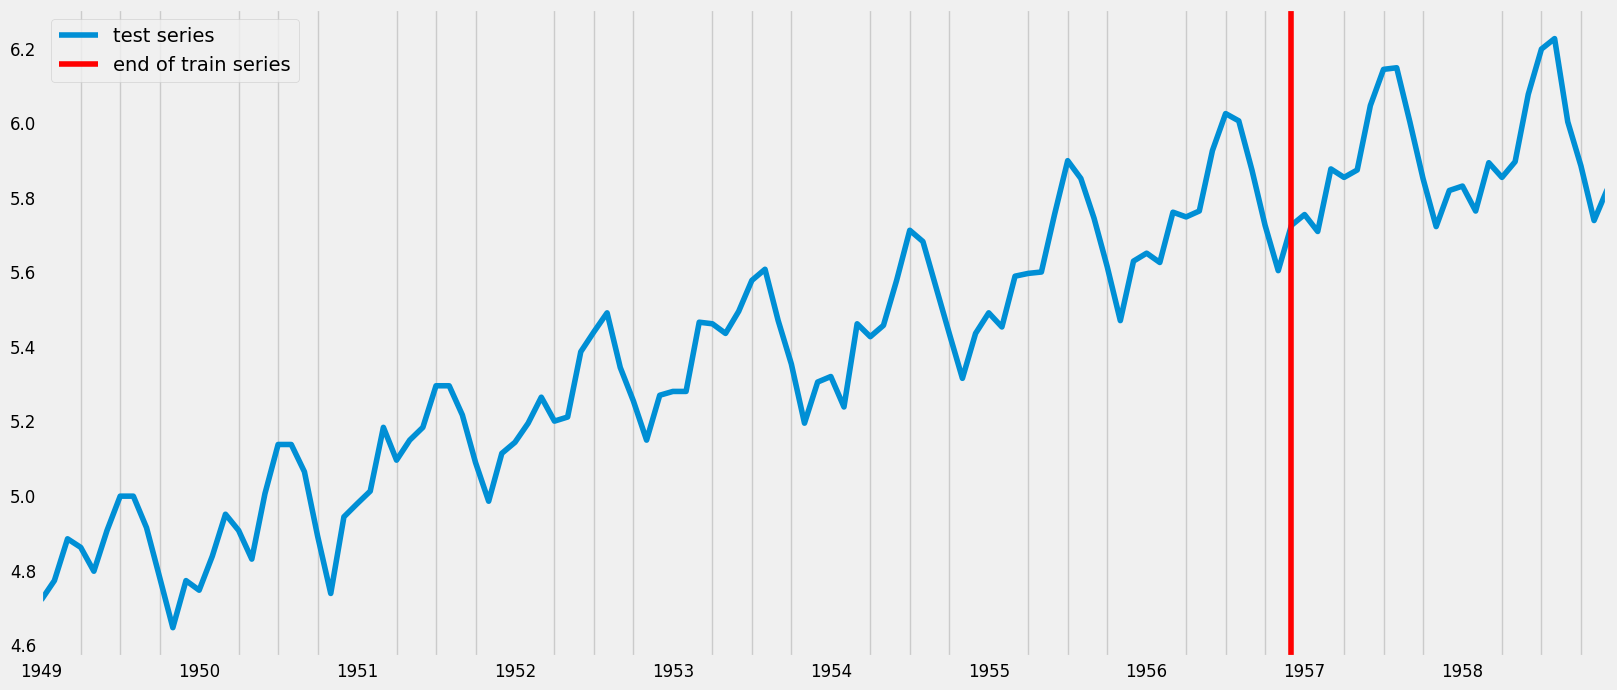

In [21]:

# -----------------------------------------------------------------------------
# DeepAR
# -----------------------------------------------------------------------------

# %pip install "gluonts[torch]"
# mac M1/M2:
# pip install "gluonts[torch]"
# conda env config vars set PYTORCH_ENABLE_MPS_FALLBACK=1


from gluonts.dataset.common import ListDataset
from gluonts.dataset.util import to_pandas
from gluonts.torch.model.deepar import DeepAREstimator
from gluonts.evaluation.backtest import make_evaluation_predictions
import torch


def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = 150
    prediction_intervals = (50.0, 90.0)
    legend = ["observations", "median prediction"] + \
        [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  # plot the time series
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()


furniture_da = furniture_train.set_index("ds")
print(furniture_da)
df_furniture = pd.DataFrame(furniture_da['y'].resample('M').mean())

# Entrenamiento
steps = 24
endTrain = df_furniture.index[-steps-1]

training_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.y[:endTrain], }],
    freq="M"
)

# Train
entry = next(iter(training_data))
train_series = to_pandas(entry)

# Test (en realidad, train + test)
test_data = ListDataset(
    [{"start": df_furniture.index[0], "target": df_furniture.y}],
    freq="M"
)

entry = next(iter(test_data))
test_series = to_pandas(entry)

test_series.plot()
plt.axvline(df_furniture.index[-steps-1], color='r')  # end of train dataset
plt.grid(which="both")
plt.legend(["test series", "end of train series"], loc="upper left")
plt.show()


In [12]:

# context_length — The number of time-points that the model gets to see before making the prediction.
# prediction_length — The number of time-steps that the model is trained to predict, also called the forecast horizon.
# freq — The granularity of the time series in the dataset.
# num_cells — The number of cells to use in each hidden layer of the RNN.
# num_layers — The number of hidden layers in the RNN.


estimator = DeepAREstimator(freq="M",
                            context_length=steps,
                            prediction_length=steps,
                            dropout_rate=0.01,
                            trainer_kwargs={"max_epochs": 10, "accelerator": "cpu"}) 
                            # trainer_kwargs={"max_epochs": 100, "accelerator": "mps"}) # Revienta en M1 actualizado 21/11/2022
                                                                                        # Probar con "cuda" en un PC con nvidia
                                                                                        # y con M1 con otro build de gluonts

predictor = estimator.train(training_data)

# Estimación en la última ventana del conjunto de test
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_data,  # test dataset
    predictor=predictor,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts = list(forecast_it)
print(test_data)
tss = list(ts_it)
ts_entry = tss[0]
forecast_entry = forecasts[0]

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type        | Params | In sizes                                                   | Out sizes   
------------------------------------------------------------------------------------------------------------------
0 | model | DeepARModel | 23.3 K | [[1, 1], [1, 1], [1, 61, 2], [1, 61], [1, 61], [1, 24, 2]] | [1, 100, 24]
------------------------------------------------------------------------------------------------------------------
23.3 K    Trainable params
0         Non-trainable params
23.3 K    Total params
0.093     Total estimated model params size (MB)


Epoch 0: : 50it [00:01, 28.70it/s, loss=1.29, v_num=1, train_loss=2.090]

Epoch 0, global step 50: 'train_loss' reached 2.09275 (best 2.09275), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=0-step=50.ckpt' as top 1


Epoch 1: : 50it [00:01, 34.66it/s, loss=-0.159, v_num=1, train_loss=-.0283] 

Epoch 1, global step 100: 'train_loss' reached -0.02832 (best -0.02832), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=1-step=100.ckpt' as top 1


Epoch 2: : 50it [00:01, 33.86it/s, loss=-0.361, v_num=1, train_loss=-.299] 

Epoch 2, global step 150: 'train_loss' reached -0.29924 (best -0.29924), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=2-step=150.ckpt' as top 1


Epoch 3: : 50it [00:01, 33.68it/s, loss=-0.562, v_num=1, train_loss=-.502]

Epoch 3, global step 200: 'train_loss' reached -0.50179 (best -0.50179), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=3-step=200.ckpt' as top 1


Epoch 4: : 50it [00:01, 33.43it/s, loss=-0.634, v_num=1, train_loss=-.610]

Epoch 4, global step 250: 'train_loss' reached -0.60983 (best -0.60983), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=4-step=250.ckpt' as top 1


Epoch 5: : 50it [00:01, 31.32it/s, loss=-0.678, v_num=1, train_loss=-.665]

Epoch 5, global step 300: 'train_loss' reached -0.66457 (best -0.66457), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=5-step=300.ckpt' as top 1


Epoch 6: : 50it [00:01, 33.29it/s, loss=-0.735, v_num=1, train_loss=-.720]

Epoch 6, global step 350: 'train_loss' reached -0.72021 (best -0.72021), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=6-step=350.ckpt' as top 1


Epoch 7: : 50it [00:01, 32.74it/s, loss=-0.771, v_num=1, train_loss=-.751]

Epoch 7, global step 400: 'train_loss' reached -0.75091 (best -0.75091), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=7-step=400.ckpt' as top 1


Epoch 8: : 50it [00:01, 32.93it/s, loss=-0.771, v_num=1, train_loss=-.768]

Epoch 8, global step 450: 'train_loss' reached -0.76849 (best -0.76849), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=8-step=450.ckpt' as top 1


Epoch 9: : 50it [00:01, 33.44it/s, loss=-0.783, v_num=1, train_loss=-.785]

Epoch 9, global step 500: 'train_loss' reached -0.78540 (best -0.78540), saving model to '/home/marcos/OneDrive/UNI/UNI 5º(año)/Inteligencia de Negocio/Entrega 2/Practica 8/lightning_logs/version_1/checkpoints/epoch=9-step=500.ckpt' as top 1
`Trainer.fit` stopped: `max_epochs=10` reached.


Epoch 9: : 50it [00:01, 33.32it/s, loss=-0.783, v_num=1, train_loss=-.785]
[{'start': Period('1949-01', 'M'), 'target': array([4.7184987, 4.7706847, 4.882802 , 4.8598123, 4.7957907, 4.905275 ,
       4.9972124, 4.9972124, 4.912655 , 4.7791233, 4.644391 , 4.7706847,
       4.744932 , 4.836282 , 4.94876  , 4.905275 , 4.828314 , 5.0039463,
       5.1357985, 5.1357985, 5.062595 , 4.890349 , 4.7361984, 4.9416423,
       4.9767337, 5.0106354, 5.1817837, 5.09375  , 5.1474943, 5.1817837,
       5.293305 , 5.293305 , 5.214936 , 5.0875964, 4.983607 , 5.1119876,
       5.1416636, 5.192957 , 5.26269  , 5.198497 , 5.209486 , 5.3844953,
       5.4380794, 5.488938 , 5.3423343, 5.2522736, 5.1474943, 5.267858 ,
       5.278115 , 5.278115 , 5.463832 , 5.4595857, 5.433722 , 5.4930615,
       5.575949 , 5.605802 , 5.46806  , 5.351858 , 5.192957 , 5.3033047,
       5.31812  , 5.236442 , 5.4595857, 5.42495  , 5.4553213, 5.575949 ,
       5.710427 , 5.6801724, 5.556828 , 5.433722 , 5.313206 , 5.433722 ,
    

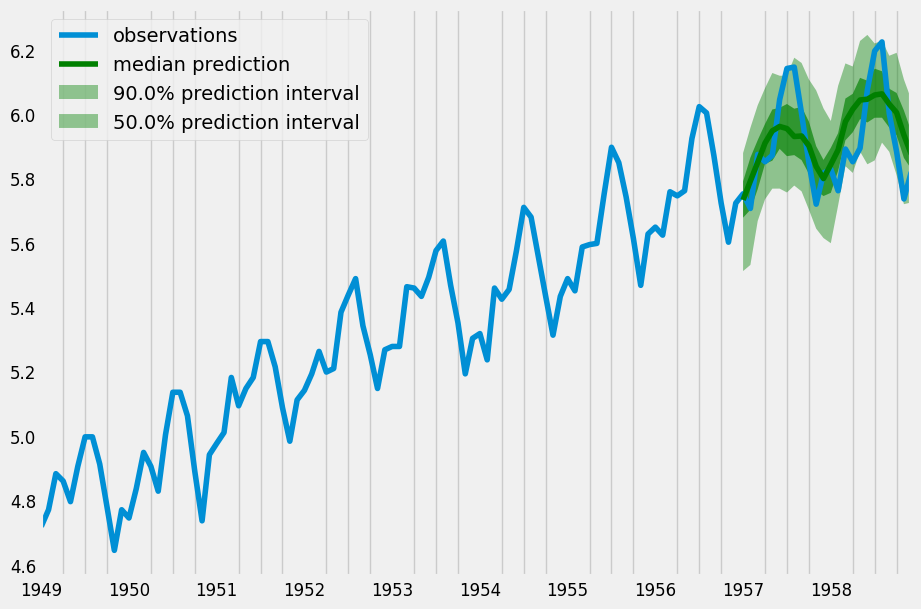

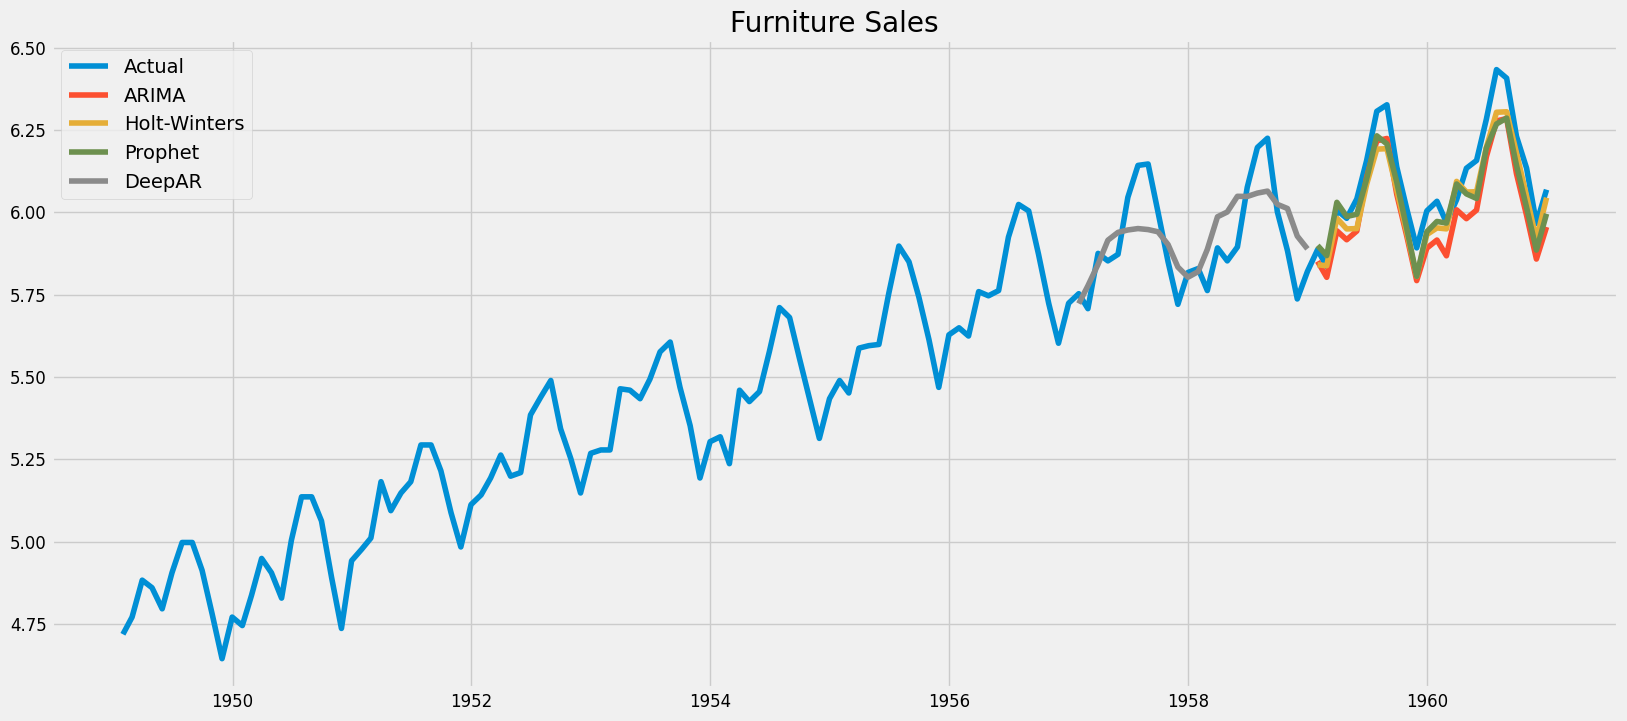

forecast_entry.mean_ts['1957']  -->  24
y_truth.values -->  24
Error cuadrático medio DEEPAR 0.04
Raíz cuadrada de ECM DEEPAR 0.2
Error porcentual medio DEEPAR 1.67


In [18]:
plot_prob_forecasts(ts_entry, forecast_entry)

plt.plot(y, label="Actual")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(forecast_entry.mean_ts, label="DeepAR")
plt.legend()
plt.title('Furniture Sales')
plt.show()

print("forecast_entry.mean_ts['1957']  --> ", len(forecast_entry.mean_ts['1957':]))
print("y_truth.values --> ", len(y_truth.values))
predicciones_deepar = forecast_entry.mean_ts['1957':]
mse = ((predicciones_deepar.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR {}'.format(round(np.sqrt(rele), 2)))


In [14]:

# -----------------------------------------------------------------------------
# DeepAR múltiple: el mismo modelo se usa para varias series
# -----------------------------------------------------------------------------

office_da = df.loc[df['Category'] == 'Office Supplies']
cols = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
        'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name', 'Quantity', 'Discount', 'Profit']
office_da.drop(cols, axis=1, inplace=True)
office_da = office_da.sort_values('Order Date')
office_da = office_da.groupby('Order Date')['Sales'].sum().reset_index()
office_da = office_da.set_index('Order Date')
df_office = pd.DataFrame(office_da['Sales'].resample('M').mean())


training_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0],
            "target": df_furniture.Sales[:endTrain].values},
        {"start": df_office.index[0],
            "target": df_office.Sales[:endTrain].values}
    ],
    freq="M"
)

test_data2 = ListDataset(
    data_iter=[
        {"start": df_furniture.index[0], "target": df_furniture.Sales.values},
        {"start": df_office.index[0], "target": df_office.Sales.values}
    ],
    freq="M"
)

estimator2 = DeepAREstimator(freq="M",
                             context_length=24,
                             prediction_length=steps,
                             dropout_rate=0.01,
                             trainer_kwargs={"max_epochs": 100})
# {"max_epochs":100, "accelerator":"mps"}

predictor2 = estimator2.train(training_data2)

# Estimación en la última ventana del conjunto de test
forecast_it2, ts_it2 = make_evaluation_predictions(
    dataset=test_data2,  # test dataset
    predictor=predictor2,  # predictor
    num_samples=100,  # number of sample paths we want for evaluation
)

forecasts2 = list(forecast_it2)
tss2 = list(ts_it2)
ts_entry2 = tss2[0]
forecast_entry2 = forecasts2[0]

plt.plot(furniture, label="Actual", c="black", lw=1, ls="dashed")
plt.plot(predicciones_arima, label="ARIMA")
plt.plot(predicciones_hw, label="Holt-Winters")
plt.plot(predicciones_prophet, label="Prophet")
plt.plot(predicciones_prophet2, label="Prophet múltiple")
plt.plot(forecast_entry.mean_ts, label="DeepAR")
plt.plot(forecast_entry2.mean_ts, label="DeepAR múltiple")
plt.legend()
plt.title('Furniture Sales')
plt.show()




NameError: name 'df' is not defined

In [ ]:
predicciones_deepar2 = forecast_entry2.mean_ts['2017-01-31':'2017-12-31']
mse = ((predicciones_deepar2.values - y_truth.values) ** 2).mean()
rele = (np.abs(predicciones_deepar2.values -
        y_truth.values)/y_truth.values*100).mean()
print('Error cuadrático medio DEEPAR 2 {}'.format(round(mse, 2)))
print('Raíz cuadrada de ECM DEEPAR 2 {}'.format(round(np.sqrt(mse), 2)))
print('Error porcentual medio DEEPAR 2 {}'.format(round(np.sqrt(rele), 2)))


NameError: name 'forecast_entry2' is not defined